In [2]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats

In [3]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
""""
Run these commands to avoid Output truncated
"""
#pd.set_option("display.max_rows", None)  # Show all rows
#pd.set_option("display.max_columns", None)  # Show all columns

'"\nRun these commands to avoid Output truncated\n'

In [18]:
def read_csv(dataset_path):
    current_path = os.getcwd()
    aux_curr_path = current_path
    project_path = aux_curr_path.replace('/notebooks', '')
    dataset_path = os.path.join(project_path, dataset_path)
    return dataset_path

In [17]:
CSV_PATH = "/content/dataset/Datos_Imgenes.csv"

In [19]:

df = pd.read_csv(read_csv(CSV_PATH))
#df = pd.read_csv(CSV_PATH)
df.head(3)

,Unnamed: 0,Date,Model,ClassId,Page,TotalPages,PagesProcessed,Fields,EmptyFields,ModelApplied,ModelReported,Details,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
0,0,2025-01-22T20:34:48-08:00,comprobante_domicilio,NaN,1,1,1,12.0,0.0,Lynx_ProofAddress_v6,NaN,CDOM-CFE[1|0.2],0.981,0.674,0.889,64.0,38.0,2523.0,263.0,CFE
1,1,2025-01-22T20:34:48-08:00,recibo_nomina,NaN,1,2,1,15.0,0.0,Lynx_ProofPaysheet_v5,NOM-IMSS[1|0.2],NOM-IMSS[1|0.2],0.948,0.931,0.943,399.0,42.0,17045.0,672.0,IMSS
2,2,2025-01-22T20:34:48-08:00,recibo_nomina,NaN,2,2,1,15.0,3.0,Lynx_ProofPaysheet_v5,NOM-IMSS[1|0.2],NOM-IMSS[1|0.2],0.941,0.837,0.910,166.0,29.0,4866.0,233.0,IMSS


In [ ]:
#CSV_PATH = "/content/Datos_Imgenes.csv"
#df = pd.read_csv(CSV_PATH)
#df.head(3)

Check missing values per column
By analyzing the data, we can identify that only two columns contain missing values: ClassID with 28,820 missing entries and ModelReported with 18,627. This is our initial assessment of the dataset; therefore, no actions, such as data removal, will be taken at this stage.

# Check missing values per column

By analyzing the data, we can identify that only two columns contain missing values: ClassID with 28,820 missing entries and ModelReported with 18,627. This is our initial assessment of the dataset; therefore, no actions, such as data removal, will be taken at this stage.

In [20]:
missing_values = df.isnull().sum()
missing_values

,0
Unnamed: 0,0
Date,0
Model,0
ClassId,28820
Page,0
TotalPages,0
PagesProcessed,0
Fields,0
EmptyFields,0
ModelApplied,0


In [21]:
df.columns

Index(['Unnamed: 0', 'Date', 'Model', 'ClassId', 'Page', 'TotalPages',
       'PagesProcessed', 'Fields', 'EmptyFields', 'ModelApplied',
       'ModelReported', 'Details', 'ConfR', 'ConfA', 'ConfW', 'Sharpness',
       'Contrast', 'Clarity', 'Resolution', 'DocType'],
      dtype='object')

In [22]:
df.describe(include="all")

,Unnamed: 0,Date,Model,ClassId,Page,TotalPages,PagesProcessed,Fields,EmptyFields,ModelApplied,ModelReported,Details,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
count,62960.000000,62960,62960,34140,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960,44333,62960,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960
unique,NaN,27436,5,4,NaN,NaN,NaN,NaN,NaN,10,1639,1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
top,NaN,2025-01-18T13:04:43-08:00,estado_cuenta,TXN,NaN,NaN,NaN,NaN,NaN,Lynx_BankingTXN_v5,NOM-IMSS[1|0.0],CLIB-CLIB[1|0.0],NaN,NaN,NaN,NaN,NaN,NaN,NaN,EC
freq,NaN,49,34140,26556,NaN,NaN,NaN,NaN,NaN,26467,1597,2952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26556
mean,47081.315025,NaN,NaN,NaN,2.934593,5.942186,3.326938,12.881210,3.495426,NaN,NaN,NaN,0.917741,0.791809,0.879958,224.199117,43.402370,10422.152731,457.302506,NaN
std,27193.866099,NaN,NaN,NaN,3.068428,4.682230,3.418311,13.533471,6.201645,NaN,NaN,NaN,0.128916,0.149599,0.091764,271.111842,11.423269,14534.007181,200.917008,NaN
min,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.001000,0.288000,0.152000,0.000000,0.000000,0.000000,0.000000,NaN
25%,23511.500000,NaN,NaN,NaN,1.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.914000,0.699000,0.849000,92.000000,36.000000,3612.000000,321.000000,NaN
50%,46975.000000,NaN,NaN,NaN,2.000000,6.000000,1.000000,12.000000,0.000000,NaN,NaN,NaN,0.956000,0.841000,0.904000,153.000000,43.000000,6363.000000,429.000000,NaN
75%,71010.250000,NaN,NaN,NaN,4.000000,8.000000,5.000000,27.000000,3.000000,NaN,NaN,NaN,0.993000,0.915000,0.930000,232.000000,50.000000,9869.000000,568.229623,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62960 entries, 0 to 62959
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62960 non-null  int64  
 1   Date            62960 non-null  object 
 2   Model           62960 non-null  object 
 3   ClassId         34140 non-null  object 
 4   Page            62960 non-null  int64  
 5   TotalPages      62960 non-null  int64  
 6   PagesProcessed  62960 non-null  int64  
 7   Fields          62960 non-null  float64
 8   EmptyFields     62960 non-null  float64
 9   ModelApplied    62960 non-null  object 
 10  ModelReported   44333 non-null  object 
 11  Details         62960 non-null  object 
 12  ConfR           62960 non-null  float64
 13  ConfA           62960 non-null  float64
 14  ConfW           62960 non-null  float64
 15  Sharpness       62960 non-null  float64
 16  Contrast        62960 non-null  float64
 17  Clarity         62960 non-null 

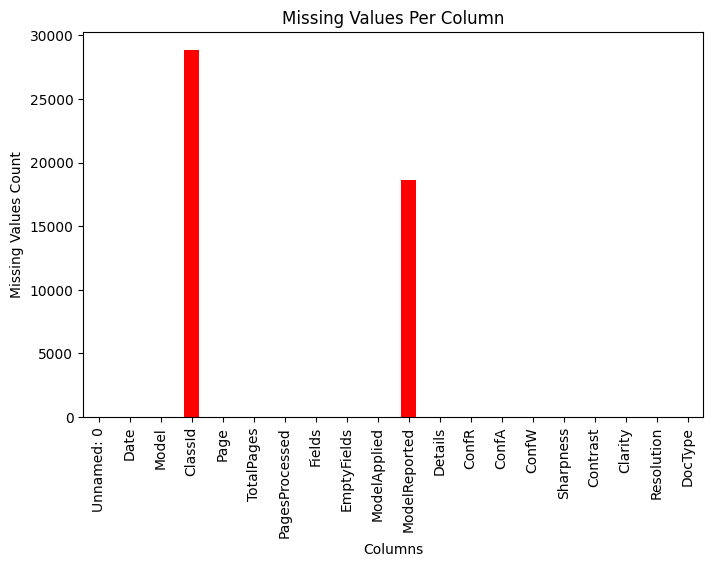

In [24]:
missing_values.plot(kind="bar", color="red", figsize=(8,5))
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.title("Missing Values Per Column")
plt.show()

In [25]:
categorical_columns = df.select_dtypes(include=["object", "category"]).columns.tolist()  # Convert to list
categorical_columns.remove("Date")  # Remove "Date" from the list
categorical_columns

['Model', 'ClassId', 'ModelApplied', 'ModelReported', 'Details', 'DocType']

In [26]:
for i in categorical_columns:
    print(df[i].value_counts())
    print("-----")

Model
estado_cuenta            34140
recibo_nomina            10193
ine                       9346
comprobante_domicilio     5780
carta_libranza            3501
Name: count, dtype: int64
-----
ClassId
TXN    26556
APP     4261
SUC     2581
ATM      742
Name: count, dtype: int64
-----
ModelApplied
Lynx_BankingTXN_v5       26467
Lynx_ProofPaysheet_v5     9722
Lynx_IdProof_v1           9346
Lynx_ATM_APP_v1           7568
Lynx_ProofAddress_v6      5780
Lynx_CLibranza_v2         3501
Lynx_IMSS3_v2              469
Lynx_BankingTXN_v6          89
Lynx_ATM_APP_v2             16
Lynx_IMSS3_v3                2
Name: count, dtype: int64
-----
ModelReported
NOM-IMSS[1|0.0]      1597
NOM-ISSSTE[1|0.0]     756
NOM-IMSS[1|0.2]       691
NOM-IMSS[1|0.3]       682
EC-EC(1)[3|0.3]       603
                     ... 
EC-ATM(1)[1|2.8]        1
NOM-ISSSTE[1|3.2]       1
NOM-IMSS[1|1.2]         1
NOM-IMSS3[1|90.3]       1
NOM-IMSS[1|2.3]         1
Name: count, Length: 1639, dtype: int64
-----
Details
CLIB-C

# Spoting Outliers

After analyzing the outliers across the columns, we can draw a few conclusions about the classification project:

The column with the highest number of outliers is "Clarity" of the page. However, after calculating the percentage of outliers, we found that they account for only 8.70% of the total data. This suggests that while clarity does have some outliers, the proportion is not significant enough to negatively impact our classification model.

Only one column, "Fields," did not report any outliers. However, this column does not provide meaningful information about the actual content of the images. To better understand its relevance to the classification task, it is necessary to request further clarification regarding the meaning and significance of each column in the dataset.

In [ ]:
numeric_df = df.select_dtypes(include=["number"])
numeric_df = numeric_df.drop("Index", axis=1)


Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
outliers.sum()

In [28]:
numeric_df.describe()

,Unnamed: 0,Page,TotalPages,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution
count,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000
mean,47081.315025,2.934593,5.942186,3.326938,12.881210,3.495426,0.917741,0.791809,0.879958,224.199117,43.402370,10422.152731,457.302506
std,27193.866099,3.068428,4.682230,3.418311,13.533471,6.201645,0.128916,0.149599,0.091764,271.111842,11.423269,14534.007181,200.917008
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.001000,0.288000,0.152000,0.000000,0.000000,0.000000,0.000000
25%,23511.500000,1.000000,2.000000,1.000000,0.000000,0.000000,0.914000,0.699000,0.849000,92.000000,36.000000,3612.000000,321.000000
50%,46975.000000,2.000000,6.000000,1.000000,12.000000,0.000000,0.956000,0.841000,0.904000,153.000000,43.000000,6363.000000,429.000000
75%,71010.250000,4.000000,8.000000,5.000000,27.000000,3.000000,0.993000,0.915000,0.930000,232.000000,50.000000,9869.000000,568.229623
max,94108.000000,48.000000,48.000000,15.000000,38.000000,21.000000,0.999000,0.984000,0.993000,10209.000000,124.000000,514200.000000,2405.000000


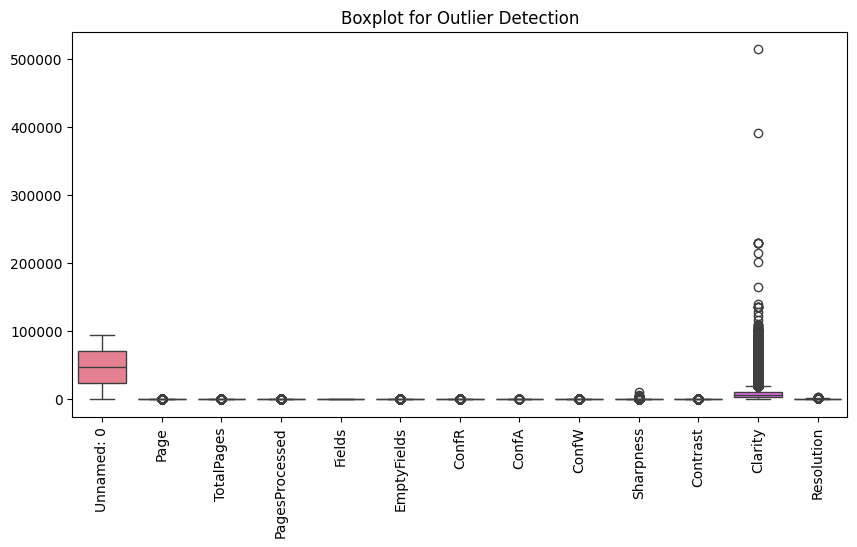

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

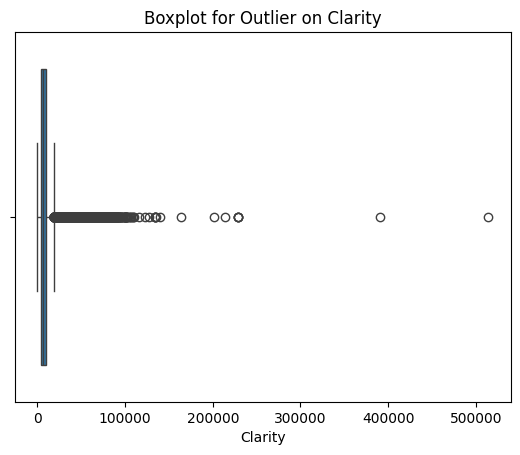

In [30]:
sns.boxplot(x=df["Clarity"])
plt.title("Boxplot for Outlier on Clarity")
plt.show()

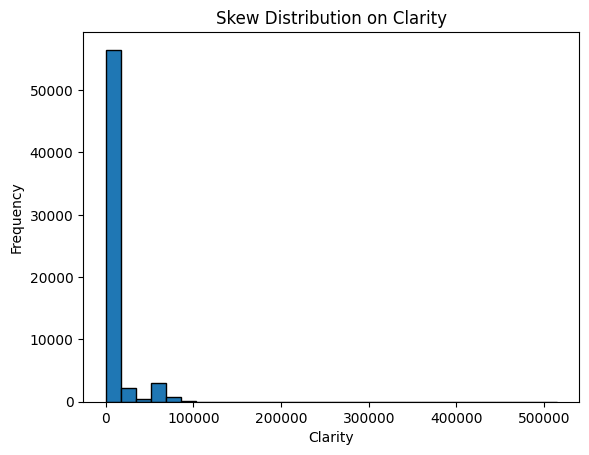

In [31]:
column = "Clarity"
plt.hist(df[column], bins=30, edgecolor="black")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.title(f"Skew Distribution on {column}")
plt.show()

In [32]:
Q1 = df["Clarity"].quantile(0.25)
Q3 = df["Clarity"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Clarity"] < (Q1 - 1.5 * IQR)) | (df["Clarity"] > (Q3 + 1.5 * IQR))]
percentage = round((len(outliers) / len(df)) * 100,3)

print(f"{percentage} % of outliers on Clarity")

8.691 % of outliers on Clarity


# **Categorical variables**

# Fos this dataset there are 4 categorical  variables.


*  Model - 5 valores unicos
*  ClassId  - 4 valores unicos
*  ModelApplied - 10 valores unicos
*  DocType   - 18 valores unicos




In [34]:
#unique values
unique_counts = df.nunique()

print(unique_counts)

Unnamed: 0        62960
Date              27436
Model                 5
ClassId               4
Page                 48
TotalPages           27
PagesProcessed       15
Fields                7
EmptyFields          22
ModelApplied         10
ModelReported      1639
Details            1905
ConfR                97
ConfA               605
ConfW               641
Sharpness          2297
Contrast           1324
Clarity           18561
Resolution         2556
DocType              18
dtype: int64


In [ ]:
# show unique values per categorical variable
unique_values_list = df[['DocType', 'Model', 'ModelApplied', 'ClassId']].apply(lambda x: list(x.unique()))

#show results
for column, unique_vals in unique_values_list.items():
    print(f"Valores únicos de {column}:")
    print(unique_vals)
    print("-" * 50)

Valores únicos de DocType:
['CFE', 'IMSS', 'INE', 'EC', 'CLIB', 'IMSS3', 'CABLE', 'APP', 'ATM', 'TEL', 'ISSSTE', 'CONST', 'SEP', 'SUC', 'PEMEX', 'AGUA', 'GAS', 'PASS']
--------------------------------------------------
Valores únicos de Model:
['comprobante_domicilio', 'recibo_nomina', 'ine', 'estado_cuenta', 'carta_libranza']
--------------------------------------------------
Valores únicos de ModelApplied:
['Lynx_ProofAddress_v6', 'Lynx_ProofPaysheet_v5', 'Lynx_IdProof_v1', 'Lynx_BankingTXN_v6', 'Lynx_CLibranza_v2', 'Lynx_IMSS3_v3', 'Lynx_ATM_APP_v2', 'Lynx_BankingTXN_v5', 'Lynx_ATM_APP_v1', 'Lynx_IMSS3_v2']
--------------------------------------------------
Valores únicos de ClassId:
[nan, 'TXN', 'APP', 'ATM', 'SUC']
--------------------------------------------------


##  DISTRIBUTIONS IN DATA SET





#"Initially, we visualize the data through histograms and boxplots to assess the distribution patterns and detect any potential skewness or outliers. This allows us to gain insights into the underlying data distribution and determine if any transformations (such as normalization or log transformations) are required to meet the assumptions of subsequent analytical models." #



Skewness of the distribution of Clarity: 4.13
Skewness of the distribution of ConfA: -0.76
Skewness of the distribution of ConfR: -3.80
Skewness of the distribution of ConfW: -2.98
Skewness of the distribution of Contrast: 1.26
Skewness of the distribution of EmptyFields: 1.73
Skewness of the distribution of Fields: 0.34
Skewness of the distribution of Page: 2.87
Skewness of the distribution of PagesProcessed: 1.71
Skewness of the distribution of Resolution: 1.34
Skewness of the distribution of Sharpness: 4.00
Skewness of the distribution of TotalPages: 1.76
Skewness of the distribution of Unnamed: 0: 0.00


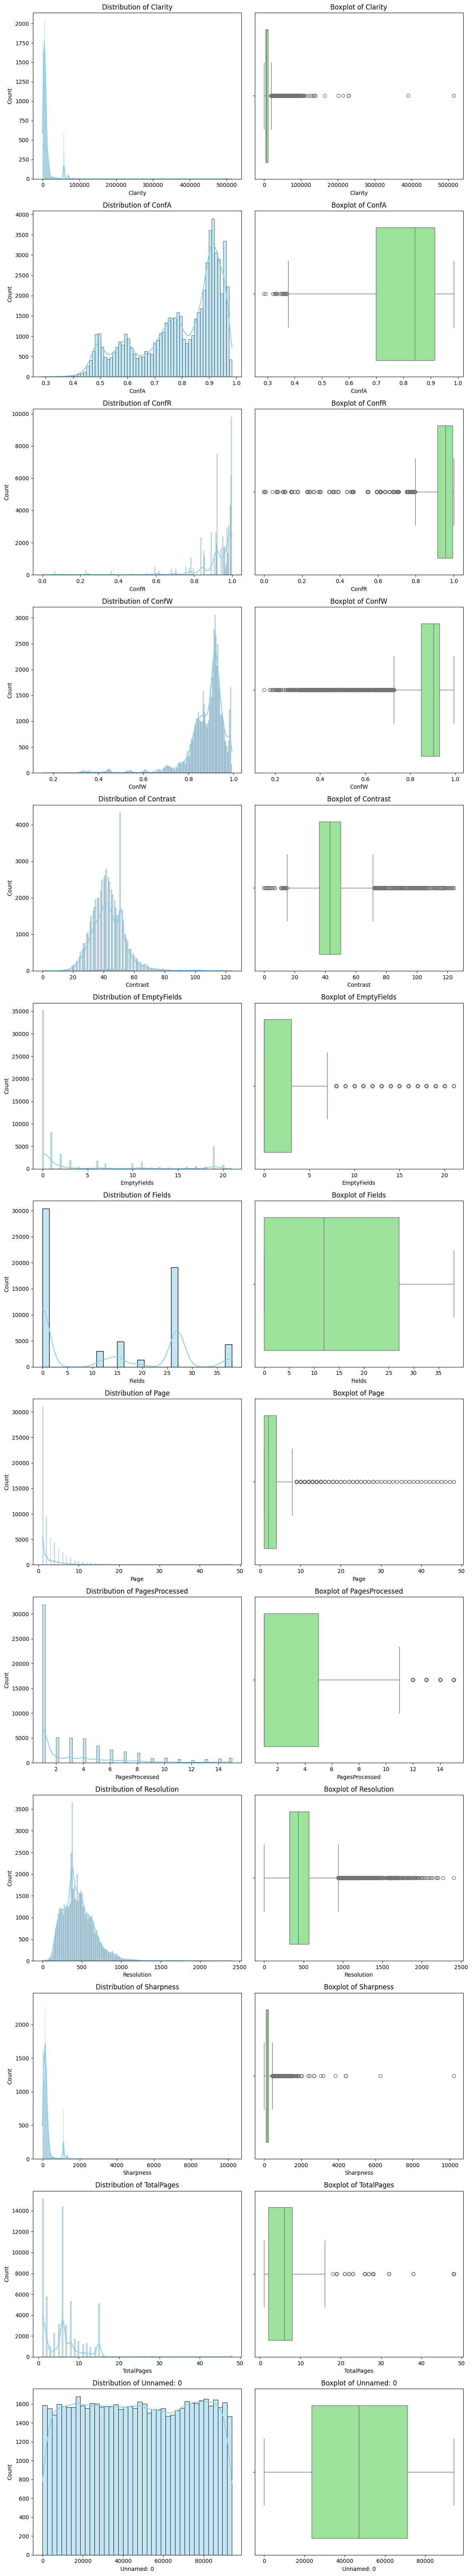

In [ ]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.difference(['Unnamed','Date', 'Index'])
#numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Visualize distributions and calculate skewness
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, len(numeric_columns)*5))

for i, column in enumerate(numeric_columns):
    # Get the data from the column
    data = df[column]

    # Histogram and KDE for the distribution
    sns.histplot(data, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Distribution of {column}")

    # Boxplot to observe symmetry and possible outliers
    sns.boxplot(x=data, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"Boxplot of {column}")

    # Calculate the skewness of the distribution
    skewness_value = skew(data.dropna())  # .dropna() to remove null values
    print(f"Skewness of the distribution of {column}: {skewness_value:.2f}")

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

# We found that Most of the variables in the  dataset shows degree of asymmetry of the distributions.


#INSIGHTS

**Sharpness: 4.00**
The high positive skew indicates that most of the sharpness values are clustered at the lower range, but there are a few documents with unusually high sharpness scores, which create a long right tail. This might suggest that sharpness values are mostly average or low, with a few documents having very high sharpness.

**Contrast: 1.26**
This is a moderately positively skewed distribution. There are more values on the lower end of the contrast scale, with a few higher values creating a tail on the right side. It suggests that most of the documents have a moderate contrast, with some having much higher contrast.

**Clarity: 4.13**
Similar to "Sharpness," this is strongly positively skewed. This suggests that clarity values are concentrated in the lower range, with a few documents having extremely high clarity, pulling the distribution to the right.

**Resolution: 1.34**
This is positively skewed with a moderate value. It indicates that the resolution values are generally low for most documents, but there are a few documents with high resolution, creating a right tail in the distribution.

**ConfR: -3.80**

This is a strongly negatively skewed distribution. The large negative skew indicates that most of the data points are clustered towards the higher values of "ConfR," with a long tail of lower values. In this case, "ConfR"  seems to have values mostly concentrated at the upper end, with a few extreme low values pulling the distribution leftward.

**ConfA: -0.76**

Interpretation: This is a moderately negatively skewed distribution. The skewness of -0.76 indicates a distribution where most of the "ConfA" values are at the higher end of the scale, but there is a noticeable left tail (with some very low values pulling the distribution to the left).


#To address the skewed distributions in the data, we applied transformations following this guidelines:



1.   Log transformation (for positive skew): Can help normalize positively skewed data.
2.   Square root or cube root transformation (for moderate skew): May also help reduce skewness.
3.   Box-Cox or Yeo-Johnson transformation: More complex transformations that can handle both positive and negative skew.





Skewness of Clarity after Log transformation: 0.01
Skewness of ConfA after Box-Cox transformation: -0.26
Skewness of ConfR after Box-Cox transformation: -0.59
Skewness of ConfW after Box-Cox transformation: -0.14
Skewness of Contrast after Log transformation: -0.72
Skewness of EmptyFields after Log transformation: 1.05
Skewness of Fields after Sqrt transformation: 0.07
Skewness of Page after Log transformation: 1.00
Skewness of PagesProcessed after Log transformation: 0.82
Skewness of Resolution after Log transformation: -0.65
Skewness of Sharpness after Log transformation: -0.00
Skewness of TotalPages after Log transformation: -0.19
Skewness of Unnamed: 0 after Sqrt transformation: -0.56


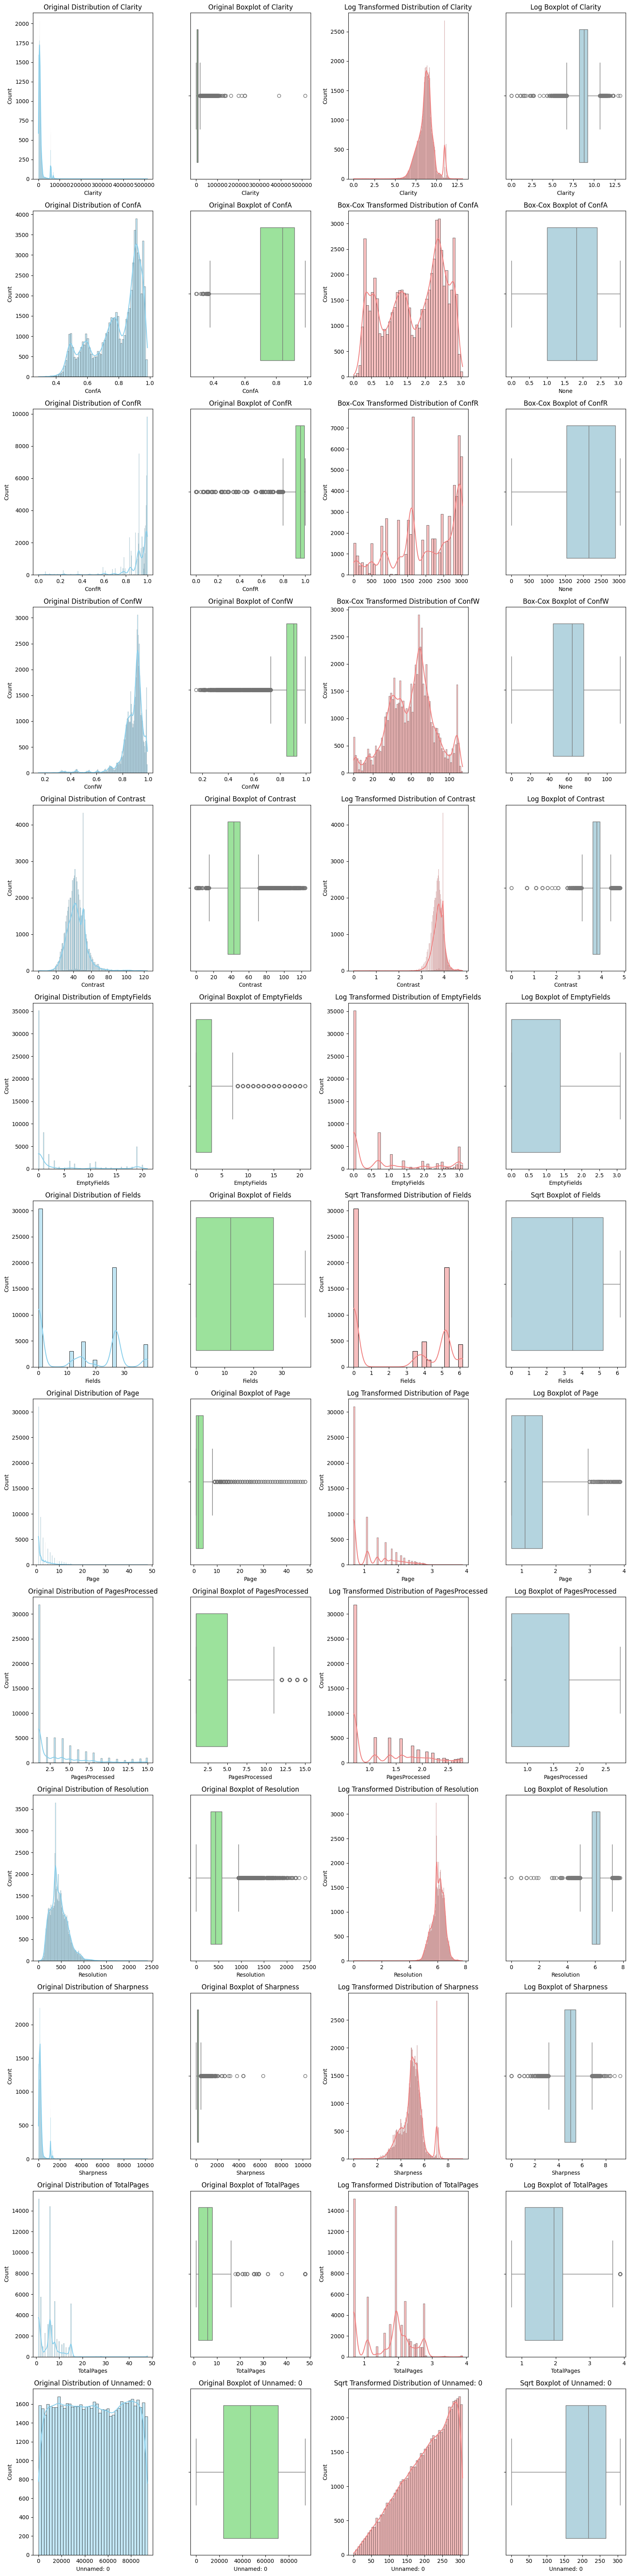

In [ ]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.difference(['Unnamed', 'Date', 'Index'])

# Visualize original and transformed distributions
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=4, figsize=(16, len(numeric_columns)*5))

for i, column in enumerate(numeric_columns):
    # Get the original data
    data = df[column]

    # Plot original data (histogram and boxplot)
    sns.histplot(data, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Original Distribution of {column}")

    sns.boxplot(x=data, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"Original Boxplot of {column}")

    # Initialize transformed data and transformation type
    transformation_type = "None"
    transformed_data = data

    # Apply transformations based on skewness
    skewness_value = skew(data.dropna())

    if skewness_value > 0.5:  # Right-skewed data -> Log Transformation
        transformed_data = np.log1p(data)  # log(1 + x) to handle zero or small values
        transformation_type = "Log"
    elif skewness_value > 0:  # Slightly right-skewed data -> Square Root Transformation
        transformed_data = np.sqrt(data)
        transformation_type = "Sqrt"
    elif skewness_value < -0.5:  # Left-skewed data -> Box-Cox Transformation (ensure positive values)
        # Ensure the data is positive, Box-Cox requires all values > 0
        data_pos = data - data.min() + 1  # Shift the data to make it positive
        transformed_data, _ = boxcox(data_pos)  # Apply Box-Cox transformation
        transformation_type = "Box-Cox"

    # Convert transformed data back to a pandas Series if it's a NumPy array
    if isinstance(transformed_data, np.ndarray):
        transformed_data = pd.Series(transformed_data, index=data.index)

    # Plot transformed data (histogram and boxplot)
    sns.histplot(transformed_data, kde=True, ax=axes[i, 2], color='lightcoral')
    axes[i, 2].set_title(f"{transformation_type} Transformed Distribution of {column}")

    sns.boxplot(x=transformed_data, ax=axes[i, 3], color='lightblue')
    axes[i, 3].set_title(f"{transformation_type} Boxplot of {column}")

    # Print skewness of the transformed data
    transformed_skewness = skew(transformed_data.dropna())  # Now dropna() works since it's a Series
    print(f"Skewness of {column} after {transformation_type} transformation: {transformed_skewness:.2f}")
# Adjust the layout of the plots
plt.tight_layout()
plt.show()

## **Are temporal trends identified?**

#Although there is a  "Date" Field(regarding to the date the image/file was originated) is not relevant for the analysis for the following:





* #  the "Date" field does not have a clear impact on the data
* #   There are no time-dependent variables( trends or seasonalities)
* #   The date is not  associated with important events (such as promotions, peak seasons, etc.)







#Correlations among variables

#Due to the context of the problem a  dependent variable is not defined or does not have a target variable. The problem will be approach from a cluster perspective. Despite this  a correlation matrix will be displayed to visualize how all variables in the dataset are related to each other.

                 Clarity     ConfA     ConfR     ConfW  Contrast  EmptyFields  \
Clarity         1.000000  0.153853  0.127456  0.200587  0.282829    -0.165022   
ConfA           0.153853  1.000000 -0.214491  0.278158  0.147393     0.077611   
ConfR           0.127456 -0.214491  1.000000  0.878512 -0.061520    -0.294605   
ConfW           0.200587  0.278158  0.878512  1.000000  0.011576    -0.251788   
Contrast        0.282829  0.147393 -0.061520  0.011576  1.000000    -0.016318   
EmptyFields    -0.165022  0.077611 -0.294605 -0.251788 -0.016318     1.000000   
Fields         -0.092188  0.039716 -0.080796 -0.060057 -0.075965     0.636737   
Page           -0.134921 -0.094785 -0.130940 -0.175170 -0.042542     0.160590   
PagesProcessed -0.118856 -0.272182 -0.008607 -0.141605 -0.036712     0.116186   
Resolution      0.313468 -0.245563  0.149684  0.027065  0.235811    -0.204622   
Sharpness       0.985382  0.144175  0.143305  0.211438  0.182808    -0.168554   
TotalPages     -0.035669 -0.

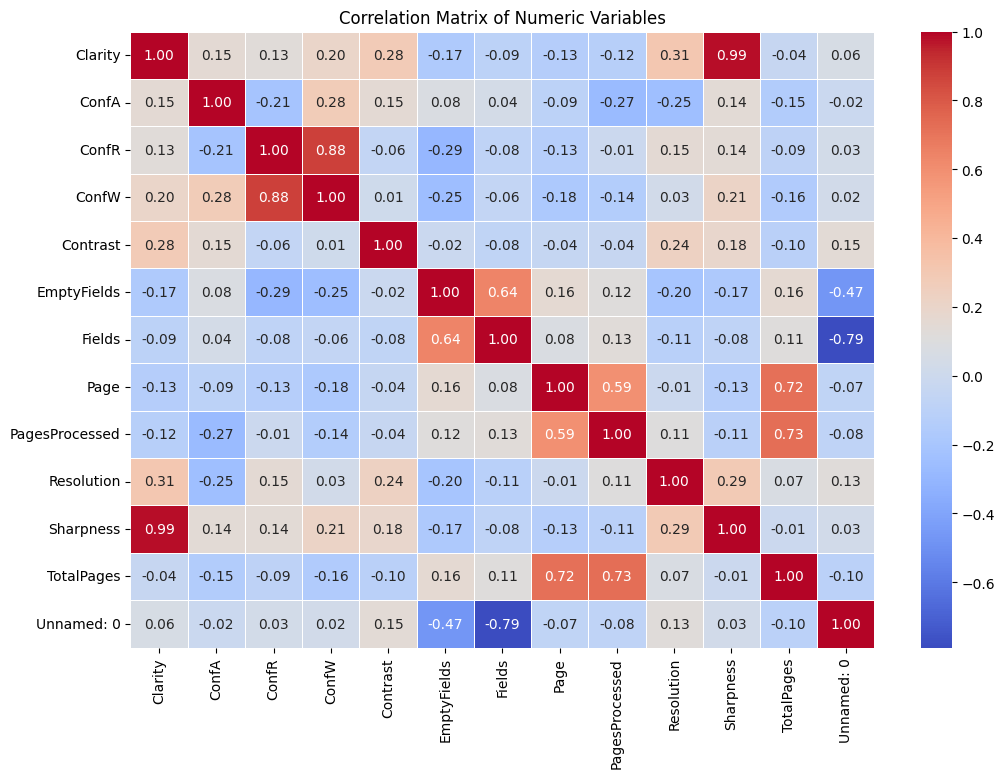

In [ ]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.difference(['Unnamed', 'Date', 'Index'])

# Calcular la correlación entre las variables numéricas
correlation_matrix = df[numeric_columns].corr()

# Mostrar la matriz de correlación entre las variables numéricas
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

#Also a boxplot will be displayed targeting the "Doctype" field to see if there is any relation between the numeric values vs the type of file identified.

<ipython-input-5-4b696dc31004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DocType', y=column, data=df, palette='Set3')
<ipython-input-5-4b696dc31004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DocType', y=column, data=df, palette='Set3')
<ipython-input-5-4b696dc31004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DocType', y=column, data=df, palette='Set3')
<ipython-input-5-4b696dc31004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

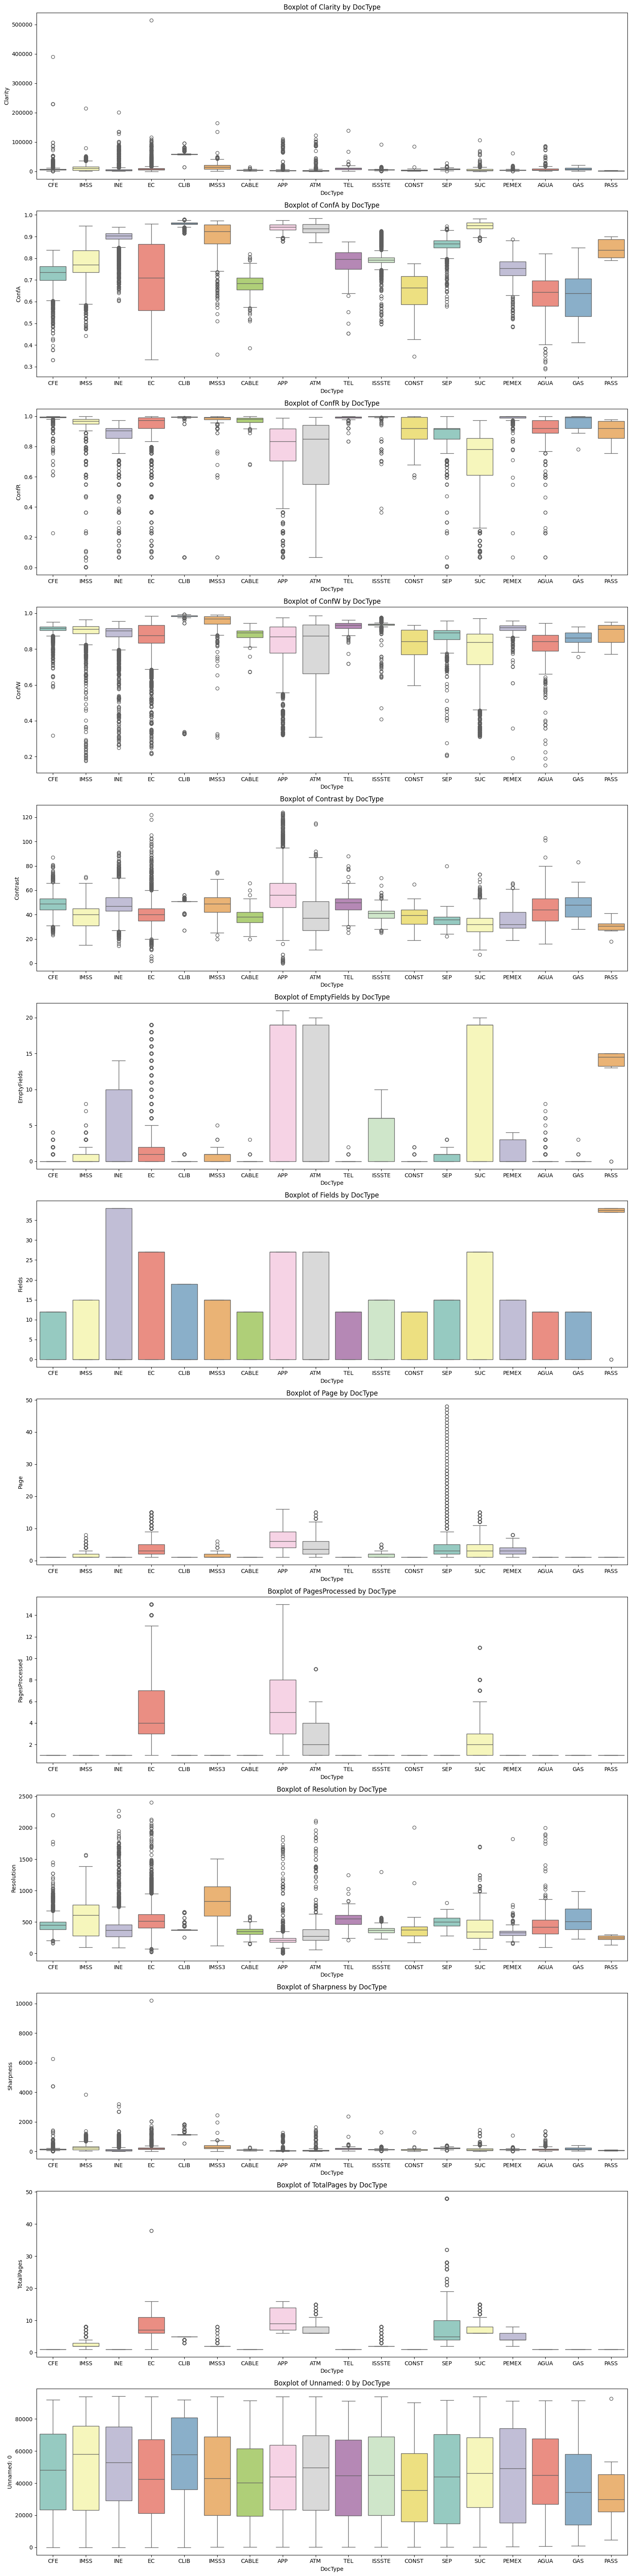

In [ ]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.difference(['Unnamed', 'Date', 'Index'])

# Configurar el tamaño de la figura
plt.figure(figsize=(16, len(numeric_columns)*5))

# Iterar sobre cada columna numérica para crear un boxplot comparando con 'DocType'
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)  # Subgráficas
    sns.boxplot(x='DocType', y=column, data=df, palette='Set3')
    plt.title(f"Boxplot of {column} by DocType")
    plt.xlabel('DocType')
    plt.ylabel(column)

# Ajustar la disposición de las subgráficas para evitar solapamientos
plt.tight_layout()
plt.show()